In [1]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(x)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
df.columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
x = df[['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']]
x = np.array(x)
y = np.array(y)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow.keras as models
import tensorflow.keras.layers as layers

In [33]:
model = models.Sequential([
 layers.Dense(16, activation='relu', input_shape=(4,)),
 layers.Dropout(0.3),
 layers.Dense(8, activation='relu'),
 layers.Dropout(0.2),
 layers.Dense(3, activation='softmax')
 ])

# Compile the model
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']) 

C:\Users\sajee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=42)
ytrain

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [37]:
# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
 monitor='val_loss',
 patience=20,
 restore_best_weights=True
 )
history = model.fit(xtrain, ytrain,
 epochs=200,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping],
 verbose=1)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.3307 - loss: 1.3145 - val_accuracy: 0.2917 - val_loss: 1.0615
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3099 - loss: 1.3406 - val_accuracy: 0.2917 - val_loss: 1.0532
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3216 - loss: 1.3511 - val_accuracy: 0.2917 - val_loss: 1.0464
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3464 - loss: 1.2808 - val_accuracy: 0.2917 - val_loss: 1.0404
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2969 - loss: 1.3570 - val_accuracy: 0.2917 - val_loss: 1.0341
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2630 - loss: 1.3399 - val_accuracy: 0.2917 - val_loss: 1.0288
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3971 - loss: 1.2119 - val_accuracy: 0.2917 - val_loss: 1.0252
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3490 - loss: 1.2537 - val_accuracy: 0.2917 - val_loss

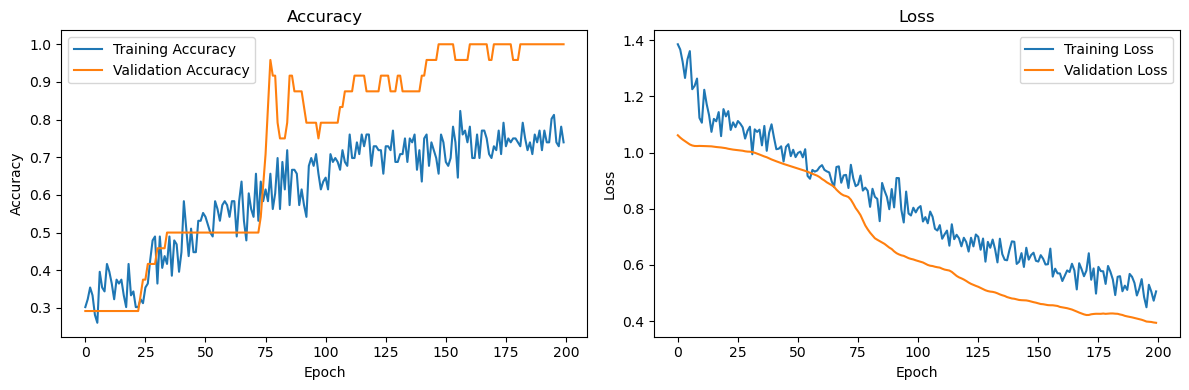

In [39]:
def plot_training_history(history):
 plt.figure(figsize=(12, 4))

 # Plot accuracy
 plt.subplot(1, 2, 1)
 plt.plot(history.history['accuracy'], label='Training Accuracy')
 plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
 plt.title('Accuracy')
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.legend()

 # Plot loss
 plt.subplot(1, 2, 2)
 plt.plot(history.history['loss'], label='Training Loss')
 plt.plot(history.history['val_loss'], label='Validation Loss')
 plt.title('Loss')
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.legend()

 plt.tight_layout()
 plt.show()


plot_training_history(history)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
ypred = model.predict(xtest)
ypredcl= ypred.argmax(axis=1)
print(classification_report(ypredcl,ytest))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
              precision    recall  f1-score   support

           0       0.10      1.00      0.18         1
           1       1.00      0.31      0.47        29
           2       0.00      0.00      0.00         0

    accuracy                           0.33        30
   macro avg       0.37      0.44      0.22        30
weighted avg       0.97      0.33      0.46        30



C:\Users\sajee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sajee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sajee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
test_loss, test_accuracy = model.evaluate(xtest, ytest, verbose=0)

In [14]:
print(test_loss, test_accuracy)

0.44630640745162964 0.8999999761581421


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731 (2.86 KB)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 488 (1.91 KB)

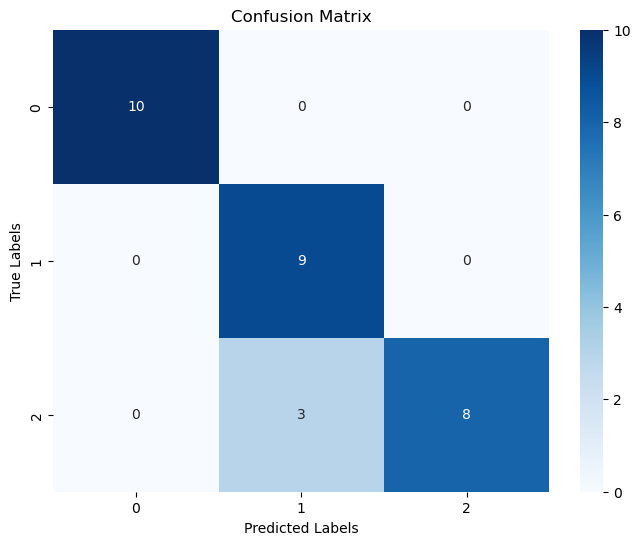

In [16]:
cm = confusion_matrix(ytest, ypredcl)
import seaborn as sns
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()